In [3]:
# Libraries
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Data Collection

In [5]:
#Data Cleaning

#77,957 rows

#1. Import historical Disease Outbreak data into python program

#Disease Outbreaks
disease_outbreaks = pd.read_csv('disease_outbreak.csv', encoding='latin-1')


#2. Remove rows for "WHO Regions" and "Global" from
disease_outbreaks = disease_outbreaks[disease_outbreaks["GROUP"].str.contains("WHO Regions|Global") == False]
#d_outbreak.info()
#Count with "WHO Regions" removed: 75822 entries, 0 to 77955
#Count with "WHO Regions" and "Countries" removed: 75446 entries, 0 to 77955


#3. Drop "Group", "CODE", "DISEASE"
disease_outbreaks = disease_outbreaks.drop(columns=['GROUP', 'CODE','DISEASE'])

# d_outbreak
#
#3. Convert each country's cases per disease into features
disease_features = disease_outbreaks.pivot_table('CASES',['NAME', 'YEAR'], 'DISEASE_DESCRIPTION')
# features.to_csv("semiclean.csv")
# disease_features = disease_features.rename_axis('YEAR').reset_index()
disease_features = disease_features.reset_index()
disease_features


DISEASE_DESCRIPTION,NAME,YEAR,Congenital rubella syndrome,Diphtheria,Japanese encephalitis,Measles,Mumps,Neonatal tetanus,Pertussis,Poliomyelitis,Rubella,Total tetanus,Yellow fever
0,Afghanistan,1980,NaN,1939.0,NaN,32455.0,NaN,16.0,15748.0,880.0,NaN,1618.0,NaN
1,Afghanistan,1981,NaN,1464.0,NaN,31107.0,NaN,14.0,15388.0,837.0,NaN,1208.0,NaN
2,Afghanistan,1982,NaN,1563.0,NaN,20320.0,NaN,121.0,8528.0,1390.0,NaN,1481.0,NaN
3,Afghanistan,1983,NaN,1940.0,NaN,18808.0,NaN,NaN,10209.0,1991.0,NaN,912.0,NaN
4,Afghanistan,1984,NaN,555.0,NaN,16199.0,NaN,NaN,6175.0,552.0,NaN,355.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8221,"occupied Palestinian territory, including east...",2017,0.0,0.0,0.0,63.0,2267.0,0.0,125.0,NaN,0.0,0.0,0.0
8222,"occupied Palestinian territory, including east...",2018,0.0,0.0,0.0,0.0,1872.0,0.0,57.0,NaN,0.0,0.0,0.0
8223,"occupied Palestinian territory, including east...",2019,NaN,NaN,NaN,228.0,656.0,NaN,22.0,NaN,0.0,NaN,NaN
8224,"occupied Palestinian territory, including east...",2020,NaN,0.0,0.0,1001.0,239.0,NaN,18.0,0.0,NaN,NaN,0.0


In [21]:
## Collecting Dataset 2; Vaccine Coverage Across the World 1980 - 2021

#Vaccines
vaccine_coverage = pd.read_csv('vaccine_coverage.csv', encoding='latin-1')

#2. Remove rows for all other entries except entries for countries
vaccine_coverage = vaccine_coverage[vaccine_coverage["GROUP"].str.contains("Created: 2022-03-09 8:0 UTC|WHO_REGIONS|WB_SHORT|WB_LONG|UNICEF_REGIONS|GLOBAL|GAVI_PHASES|DEVELOPMENT_STATUS") == False]

#Columns to remove
# WHO_REGIONS
# WB_SHORT
# WB_LONG
# UNICEF_REGIONS
# GLOBAL
# GAVI_PHASES
# DEVELOPMENT_STATUS
# Created: 2022-03-09 8:0 UTC

# #Count with all other entries but "COUNTRIES" removed: 328,689 entries
# #Count with original data set: 344,141 entries

#3. Leave only data for "Official Coverage"
vaccine_coverage = vaccine_coverage[vaccine_coverage["COVERAGE_CATEGORY_DESCRIPTION"].str.contains("Administrative coverage|WHO/UNICEF Estimates of National Immunization Coverage|PAB Estimates|HPV Estimates") == False]

# Administrative coverage
# Official coverage
# WHO/UNICEF Estimates of National Immunization Coverage
# PAB Estimates
# HPV Estimates
# #Count with "Official Coverage data left": 101,681 entries


#4. Drop 'GROUP', 'CODE', 'ANTIGEN_DESCRIPTION', 'COVERAGE_CATEGORY', 'COVERAGE_CATEGORY_DESCRIPTION','TARGET_NUMBER','DOSES'

vaccine_coverage = vaccine_coverage.drop(columns=['GROUP', 'CODE', 'ANTIGEN_DESCRIPTION', 'COVERAGE_CATEGORY', 'COVERAGE_CATEGORY_DESCRIPTION','TARGET_NUMBER','DOSES'])


#5. Convert each country's cases per disease into features
vaccine_features = vaccine_coverage.pivot_table('COVERAGE',['NAME', 'YEAR'], 'ANTIGEN')

vaccine_features = vaccine_features.reset_index()
# vaccine_coverage
# vaccine_features = vaccine_features.rename({'ANTIGEN': 'INDEX'})
# vaccine_features = vaccine_features.rename_axis('INDEX')

vaccine_features = vaccine_features.astype({"YEAR": int})
vaccine_features
# vaccine_features.to_csv("vaccine_features.csv")



ANTIGEN,NAME,YEAR,BCG,DIPHCV4,DIPHCV5,DIPHCV6,DTPCV1,DTPCV3,HEPB3,HEPB_BD,...,ROTA1,ROTAC,TT2PLUS,TTCV4,TTCV5,TTCV6,TYPHOID,TYPHOID_CONJ,VAD1,YFV
0,Afghanistan,1980,33.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1981,8.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1982,10.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1984,11.0,NaN,NaN,NaN,NaN,16.0,NaN,NaN,...,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1985,17.0,NaN,NaN,NaN,NaN,15.0,NaN,NaN,...,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7658,"occupied Palestinian territory, including east...",2007,104.0,NaN,NaN,NaN,103.0,100.0,99.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7659,"occupied Palestinian territory, including east...",2008,102.0,NaN,NaN,NaN,101.0,96.0,96.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7660,"occupied Palestinian territory, including east...",2017,100.0,NaN,NaN,NaN,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7661,"occupied Palestinian territory, including east...",2018,100.0,NaN,NaN,NaN,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
disease_features

DISEASE_DESCRIPTION,NAME,YEAR,Congenital rubella syndrome,Diphtheria,Japanese encephalitis,Measles,Mumps,Neonatal tetanus,Pertussis,Poliomyelitis,Rubella,Total tetanus,Yellow fever
0,Afghanistan,1980,NaN,1939.0,NaN,32455.0,NaN,16.0,15748.0,880.0,NaN,1618.0,NaN
1,Afghanistan,1981,NaN,1464.0,NaN,31107.0,NaN,14.0,15388.0,837.0,NaN,1208.0,NaN
2,Afghanistan,1982,NaN,1563.0,NaN,20320.0,NaN,121.0,8528.0,1390.0,NaN,1481.0,NaN
3,Afghanistan,1983,NaN,1940.0,NaN,18808.0,NaN,NaN,10209.0,1991.0,NaN,912.0,NaN
4,Afghanistan,1984,NaN,555.0,NaN,16199.0,NaN,NaN,6175.0,552.0,NaN,355.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8221,"occupied Palestinian territory, including east...",2017,0.0,0.0,0.0,63.0,2267.0,0.0,125.0,NaN,0.0,0.0,0.0
8222,"occupied Palestinian territory, including east...",2018,0.0,0.0,0.0,0.0,1872.0,0.0,57.0,NaN,0.0,0.0,0.0
8223,"occupied Palestinian territory, including east...",2019,NaN,NaN,NaN,228.0,656.0,NaN,22.0,NaN,0.0,NaN,NaN
8224,"occupied Palestinian territory, including east...",2020,NaN,0.0,0.0,1001.0,239.0,NaN,18.0,0.0,NaN,NaN,0.0


In [8]:
vaccine_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7663 entries, 0 to 7662
Data columns (total 41 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   NAME          7663 non-null   object 
 1   YEAR          7663 non-null   int32  
 2   BCG           6174 non-null   float64
 3   DIPHCV4       494 non-null    float64
 4   DIPHCV5       392 non-null    float64
 5   DIPHCV6       220 non-null    float64
 6   DTPCV1        3779 non-null   float64
 7   DTPCV3        7379 non-null   float64
 8   HEPB3         3987 non-null   float64
 9   HEPB_BD       1659 non-null   float64
 10  HEPB_BDALL    468 non-null    float64
 11  HIB3          3088 non-null   float64
 12  HPV_FEM       380 non-null    float64
 13  HPV_MALE      89 non-null     float64
 14  IPV1          1136 non-null   float64
 15  IPV1_FRAC     53 non-null     float64
 16  IPV2          61 non-null     float64
 17  IPV2_FRAC     45 non-null     float64
 18  JAPENC        154 non-null  

In [9]:
vaccine_features.describe()

ANTIGEN,YEAR,BCG,DIPHCV4,DIPHCV5,DIPHCV6,DTPCV1,DTPCV3,HEPB3,HEPB_BD,HEPB_BDALL,...,ROTA1,ROTAC,TT2PLUS,TTCV4,TTCV5,TTCV6,TYPHOID,TYPHOID_CONJ,VAD1,YFV
count,7663.000000,6174.000000,494.000000,392.000000,220.000000,3779.000000,7379.000000,3987.000000,1659.000000,468.000000,...,863.000000,898.000000,3743.000000,476.000000,385.000000,231.000000,18.000000,4.000000,995.000000,810.000000
mean,2001.180347,83.904947,84.529575,80.960816,77.407500,92.220945,81.051640,85.426496,81.629204,83.063248,...,81.557879,74.748441,56.972324,83.903172,79.881429,77.167792,30.305556,59.337500,72.369437,67.857395
std,11.830421,21.614586,15.745852,19.501025,27.620589,11.961772,21.810797,18.927550,27.217263,23.777034,...,24.822680,26.408548,30.380573,17.074856,20.971407,27.353437,44.778257,37.920804,209.619964,35.076318
min,1980.000000,0.000000,3.630000,0.000000,0.000000,0.000000,0.780000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000
25%,1991.000000,78.000000,78.122500,70.837500,68.250000,90.000000,74.000000,82.000000,74.585000,76.000000,...,79.000000,69.470000,32.000000,77.682500,70.000000,68.410000,0.000000,41.250000,47.000000,56.000000
50%,2001.000000,93.000000,89.000000,86.350000,87.055000,96.000000,90.000000,92.000000,95.000000,93.695000,...,90.000000,83.950000,60.000000,89.000000,85.000000,87.000000,0.000000,67.280000,75.000000,76.975000
75%,2011.000000,98.000000,96.000000,95.000000,95.000000,99.000000,96.000000,96.800000,99.000000,98.605000,...,96.000000,92.000000,83.000000,96.000000,94.900000,95.000000,83.250000,85.367500,91.000000,88.000000
max,2021.000000,130.000000,118.350000,122.580000,144.000000,153.000000,166.000000,160.000000,150.000000,109.000000,...,115.500000,118.480000,210.840000,118.350000,122.580000,144.000000,100.000000,93.790000,6604.000000,609.000000


In [10]:
# Helper Function - Missing data check
def view_missing_data (user_data):
    missing = user_data.isnull().sum()
    available = user_data.count()
    total = (missing + available)
    percent = (user_data.isnull().sum()/user_data.isnull().count()*100).round(4)
    return pd.concat([missing, available, total, percent], axis=1, keys=['Missing', 'Available', 'Total', 'Percent']).sort_values(['Missing'], ascending=False)

view_missing_data(vaccine_features)

,Missing,Available,Total,Percent
ANTIGEN,,,,
PAB,7659,4,7663,99.9478
TYPHOID_CONJ,7659,4,7663,99.9478
JAPENC_1,7658,5,7663,99.9348
TYPHOID,7645,18,7663,99.7651
PERCV_PW,7641,22,7663,99.7129
IPV2_FRAC,7618,45,7663,99.4128
IPV1_FRAC,7610,53,7663,99.3084
IPV2,7602,61,7663,99.2040
MEN_A_CONJ,7578,85,7663,98.8908


In [11]:
view_missing_data(disease_features)

,Missing,Available,Total,Percent
DISEASE_DESCRIPTION,,,,
Japanese encephalitis,6852,1374,8226,83.2969
Congenital rubella syndrome,5501,2725,8226,66.8733
Mumps,5416,2810,8226,65.8400
Yellow fever,4794,3432,8226,58.2786
Rubella,4563,3663,8226,55.4705
Total tetanus,1362,6864,8226,16.5573
Neonatal tetanus,1342,6884,8226,16.3141
Diphtheria,1247,6979,8226,15.1593
Pertussis,1195,7031,8226,14.5271


In [12]:
combined_data = pd.merge(disease_features, vaccine_features, on=['NAME', 'YEAR'], how='left')

combined_data.to_csv("combined_data.csv")
combined_data

,NAME,YEAR,Congenital rubella syndrome,Diphtheria,Japanese encephalitis,Measles,Mumps,Neonatal tetanus,Pertussis,Poliomyelitis,...,ROTA1,ROTAC,TT2PLUS,TTCV4,TTCV5,TTCV6,TYPHOID,TYPHOID_CONJ,VAD1,YFV
0,Afghanistan,1980,NaN,1939.0,NaN,32455.0,NaN,16.0,15748.0,880.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1981,NaN,1464.0,NaN,31107.0,NaN,14.0,15388.0,837.0,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1982,NaN,1563.0,NaN,20320.0,NaN,121.0,8528.0,1390.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1983,NaN,1940.0,NaN,18808.0,NaN,NaN,10209.0,1991.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1984,NaN,555.0,NaN,16199.0,NaN,NaN,6175.0,552.0,...,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8221,"occupied Palestinian territory, including east...",2017,0.0,0.0,0.0,63.0,2267.0,0.0,125.0,NaN,...,100.0,100.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8222,"occupied Palestinian territory, including east...",2018,0.0,0.0,0.0,0.0,1872.0,0.0,57.0,NaN,...,100.0,100.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8223,"occupied Palestinian territory, including east...",2019,NaN,NaN,NaN,228.0,656.0,NaN,22.0,NaN,...,100.0,100.0,NaN,100.0,100.0,100.0,NaN,NaN,NaN,NaN
8224,"occupied Palestinian territory, including east...",2020,NaN,0.0,0.0,1001.0,239.0,NaN,18.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:

missing_data = view_missing_data(combined_data)

In [19]:
# combined_data.corr()

#Cleaned Data

#
combined_data.drop(combined_data.columns[[2,4,6,10,11,13,14,15,16,17,19,20,21,22,23,24,25,26,27,28,29,30,33,35,36,37,38,39,41,42,43,44,45,46,47,48,49,50]], axis=1, inplace=True)

combined_data.head(20)

,NAME,YEAR,Diphtheria,Measles,Neonatal tetanus,Pertussis,Poliomyelitis,Yellow fever,DTPCV3,MCV1,MCV2,PAB,POL3,YFV
0,Afghanistan,1980,1939.0,32455.0,16.0,15748.0,880.0,NaN,4.0,11.0,NaN,NaN,3.0,NaN
1,Afghanistan,1981,1464.0,31107.0,14.0,15388.0,837.0,NaN,3.0,6.0,NaN,NaN,3.0,NaN
2,Afghanistan,1982,1563.0,20320.0,121.0,8528.0,1390.0,NaN,5.0,8.0,NaN,NaN,5.0,NaN
3,Afghanistan,1983,1940.0,18808.0,NaN,10209.0,1991.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1984,555.0,16199.0,NaN,6175.0,552.0,NaN,16.0,13.0,NaN,NaN,16.0,NaN
5,Afghanistan,1985,3179.0,14457.0,NaN,8531.0,1981.0,NaN,15.0,14.0,NaN,NaN,15.0,NaN
6,Afghanistan,1986,1053.0,8107.0,NaN,5872.0,1843.0,NaN,11.0,14.0,NaN,NaN,11.0,NaN
7,Afghanistan,1987,1272.0,10357.0,NaN,6073.0,628.0,NaN,25.0,31.0,NaN,NaN,25.0,NaN
8,Afghanistan,1988,661.0,4561.0,NaN,4587.0,307.0,NaN,35.0,34.0,NaN,NaN,35.0,NaN
9,Afghanistan,1989,286.0,1170.0,NaN,1494.0,55.0,NaN,33.0,22.0,NaN,NaN,33.0,NaN


In [20]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8226 entries, 0 to 8225
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NAME              8226 non-null   object 
 1   YEAR              8226 non-null   int64  
 2   Diphtheria        6979 non-null   float64
 3   Measles           7715 non-null   float64
 4   Neonatal tetanus  6884 non-null   float64
 5   Pertussis         7031 non-null   float64
 6   Poliomyelitis     7743 non-null   float64
 7   Yellow fever      3432 non-null   float64
 8   DTPCV3            7119 non-null   float64
 9   MCV1              6941 non-null   float64
 10  MCV2              2395 non-null   float64
 11  PAB               2 non-null      float64
 12  POL3              7075 non-null   float64
 13  YFV               782 non-null    float64
dtypes: float64(12), int64(1), object(1)
memory usage: 964.0+ KB


In [16]:
view_missing_data(combined_data)

,Missing,Available,Total,Percent
PAB,8224,2,8226,99.9757
TYPHOID_CONJ,8224,2,8226,99.9757
JAPENC_1,8221,5,8226,99.9392
PERCV_PW,8219,7,8226,99.9149
TYPHOID,8208,18,8226,99.7812
IPV2,8201,25,8226,99.6961
IPV2_FRAC,8193,33,8226,99.5988
IPV1_FRAC,8187,39,8226,99.5259
HPV_MALE,8157,69,8226,99.1612
MEN_A_CONJ,8151,75,8226,99.0883


In [17]:
### DIAGNOSTICS ###############################################################
def rmse(actual, predict):
    """Root Mean Square Error"""
    predict = np.array(predict)
    actual = np.array(actual)
    mse = mean_squared_error(actual, predict)
    rmse = sqrt(mse)
    return rmse

C:\Users\User\AppData\Local\Temp\ipykernel_26504\1439548186.py:2: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


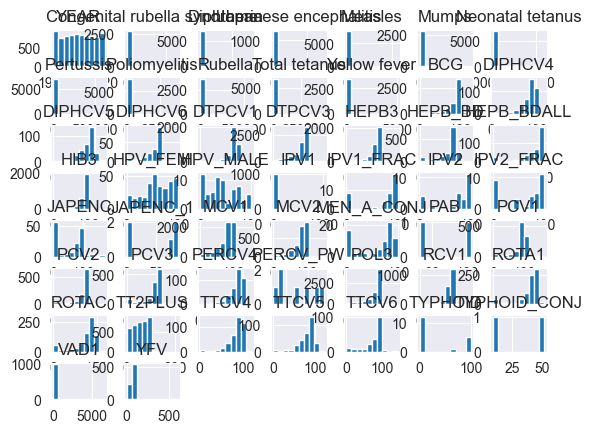

In [18]:

combined_data.hist()
plt.tight_layout()
plt.show()


In [25]:
feature_correlation = combined_data.corr()

feature_correlation = feature_correlation.sort_values(by=['YEAR'], ascending=True) #.style.background_gradient(cmap='BrBG_r')
# 'coolwarm' RdBu_r', 'BrBG_r', & PuOr_r are other good diverging colormaps

feature_correlation

,YEAR,Diphtheria,Measles,Neonatal tetanus,Pertussis,Poliomyelitis,Yellow fever,DTPCV3,MCV1,MCV2,PAB,POL3,YFV
PAB,-1.000000,NaN,NaN,NaN,-1.000000,NaN,NaN,1.000000,1.000000,1.000000,1.0,1.000000,NaN
Measles,-0.173484,0.326720,1.000000,0.363256,0.819340,0.361650,0.275461,-0.191675,-0.182024,-0.065591,NaN,-0.152644,-0.060024
Pertussis,-0.130152,0.581678,0.819340,0.503634,1.000000,0.660070,0.354858,-0.138600,-0.154815,-0.051888,-1.0,-0.107746,-0.082693
Yellow fever,-0.117634,0.323657,0.275461,0.244324,0.354858,0.596179,1.000000,-0.157853,-0.154549,-0.064399,NaN,-0.150392,-0.014415
Neonatal tetanus,-0.104422,0.340053,0.363256,1.000000,0.503634,0.681308,0.244324,-0.109773,-0.105773,-0.091700,NaN,-0.106105,-0.086961
Poliomyelitis,-0.084851,0.639807,0.361650,0.681308,0.660070,1.000000,0.596179,-0.037754,-0.070142,-0.150013,NaN,-0.029121,-0.081448
Diphtheria,-0.079697,1.000000,0.326720,0.340053,0.581678,0.639807,0.323657,-0.080346,-0.085800,-0.103131,NaN,-0.082086,-0.026530
MCV2,-0.032723,-0.103131,-0.065591,-0.091700,-0.051888,-0.150013,-0.064399,0.569789,0.611416,1.000000,1.0,0.571514,0.049380
YFV,0.208481,-0.026530,-0.060024,-0.086961,-0.082693,-0.081448,-0.014415,0.317358,0.301899,0.049380,NaN,0.293701,1.000000
POL3,0.413310,-0.082086,-0.152644,-0.106105,-0.107746,-0.029121,-0.150392,0.951008,0.869661,0.571514,1.0,1.000000,0.293701
